<a href="https://colab.research.google.com/github/Sriharshitha842/DWDM_LAB/blob/main/dwdm_lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME OF THE STUDENT : SRIHARSHITHA DEEPALA**

**REGISTRATION NUMBER : 19BCD7246**

**COURSE CODE : CSE4005**

**SLOT : L31 + L32 + L15 + L16 + L23 + L24**

**LAB NUMBER : 09**

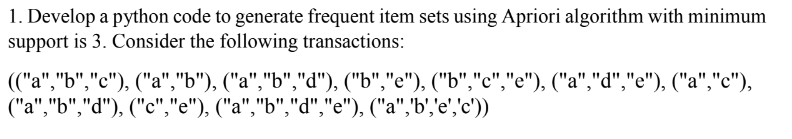

In [1]:
pip install efficient_apriori

In [17]:
import numpy as np
import pandas as pd
dataset = [["a","b","c"], ["a","b"], ["a","b","d"], ["b","e"],
["b","c","e"], ["a","d","e"], ["a","c"], ["a","b","d"],
["c","e"], ["a","b","d","e"], ["a","b","e","c"]]
df=pd.DataFrame([["a","b","c"], ["a","b"], ["a","b","d"], ["b","e"],
["b","c","e"], ["a","d","e"], ["a","c"], ["a","b","d"],
["c","e"], ["a","b","d","e"], ["a","b","e","c"]])
df.to_csv('sample.csv', index=False, header=None)

In [23]:
from efficient_apriori import apriori
min_support = 0.03
min_confidence=0.8
itemsets, rules = apriori(dataset, min_support=min_support, min_confidence=min_confidence)
print(itemsets)

{1: {('a',): 8, ('b',): 8, ('c',): 5, ('d',): 4, ('e',): 6}, 2: {('a', 'b'): 6, ('a', 'c'): 3, ('a', 'd'): 4, ('a', 'e'): 3, ('b', 'c'): 3, ('b', 'd'): 3, ('b', 'e'): 4, ('c', 'e'): 3, ('d', 'e'): 2}, 3: {('a', 'b', 'c'): 2, ('a', 'b', 'd'): 3, ('a', 'b', 'e'): 2, ('a', 'c', 'e'): 1, ('a', 'd', 'e'): 2, ('b', 'c', 'e'): 2, ('b', 'd', 'e'): 1}, 4: {('a', 'b', 'c', 'e'): 1, ('a', 'b', 'd', 'e'): 1}}


In [24]:
for rule in rules:
  print(rule)

{d} -> {a} (conf: 1.000, supp: 0.364, lift: 1.375, conv: 272727272.727)
{b, d} -> {a} (conf: 1.000, supp: 0.273, lift: 1.375, conv: 272727272.727)
{d, e} -> {a} (conf: 1.000, supp: 0.182, lift: 1.375, conv: 272727272.727)
{a, c, e} -> {b} (conf: 1.000, supp: 0.091, lift: 1.375, conv: 272727272.727)
{b, d, e} -> {a} (conf: 1.000, supp: 0.091, lift: 1.375, conv: 272727272.727)


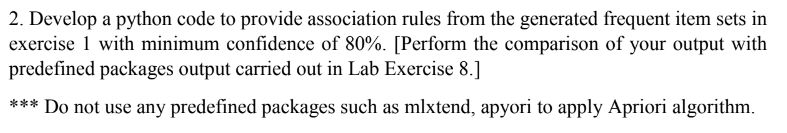

In [25]:
import csv
from itertools import combinations

def read_data(file_loc='/content/sample.csv'):
    trans = dict()
    with open(file_loc) as f:
        filedata = csv.reader(f)
        count = 0
        for line in filedata:
            count += 1
            trans[count] = list(set(line))
    return trans
    

def frequence(items_lst, trans, check=False):
    items_counts = dict()
    for i in items_lst:
        temp_i = {i}
        if check:
            temp_i = set(i)
        for j in trans.items():
            if temp_i.issubset(set(j[1])):
                if i in items_counts:
                    items_counts[i] += 1
                else:
                    items_counts[i] = 1
    return items_counts
    

def support(items_counts, trans):
    support = dict()
    total_trans = len(trans)
    for i in items_counts:
        support[i] = items_counts[i]/total_trans
    return support
    
def association_rules(items_grater_then_min_support):
    rules = []
    dict_rules = {}
    for i in items_grater_then_min_support:
        dict_rules = {}
        if type(i) != type(str()):
            i = list(i)
            temp_i = i[:]
            for j in range(len(i)):
                k = temp_i[j]
                del temp_i[j]
                dict_rules[k] = temp_i
                temp_i = i[:]
        rules.append(dict_rules)
    temp = []
    for i in rules:
        for j in i.items():
            if type(j[1]) != type(str()):
                temp.append({tuple(j[1])[0]: j[0]})
            else:
                temp.append({j[1]: j[0]})
    rules.extend(temp)
    return rules

def confidence(associations, d, min_confidence):
    ans = {}
    for i in associations:
        for j in i.items():
            if type(j[0]) == type(str()):
                left = {j[0]}
            else:
                left = set(j[0])
            if type(j[1]) == type(str()):
                right = {j[1]}
            else:
                right = set(j[1])
            for k in d:
                if type(k) != type(str()):
                    if left.union(right) - set(k) == set():
                        up = d[k]
                    if len(right) == len(set(k)) and right - set(k) == set():
                            down = d[k]
                else:
                    if len(right) >= len({k}):
                        if right - {k} == set():
                            down = d[k]
                    elif len(right) <= len({k}):
                        if {k} - right == set():
                            down = d[k]
            if up/down >= min_confidence:
                ans[tuple(left)[0]] = right, up/down, up, down
    print(ans)    


def main(min_support, min_confidence, file_loc):
    
    trans = read_data()
    number_of_trans = [len(i) for i in trans.values()]
    items_lst = set()
    
    itemcount_track = list()    
    
    for i in trans.values():
        for j in i:
            items_lst.add(j)
    
    store_item_lst = list(items_lst)[:]
    items_grater_then_min_support = list()
    items_counts = frequence(items_lst, trans)
    itemcount_track.append(items_counts)
    items_grater_then_min_support.append({j[0]:j[1] for j in support(items_counts, trans).items() if j[1]>min_support})
    
    for i in range(2, max(number_of_trans)+1):
        item_list = combinations(items_lst, i)
        items_counts = frequence(item_list, trans, check=True)
        itemcount_track.append(items_counts)
        if list({j[0]:j[1] for j in support(items_counts, trans).items() if j[1]>min_support}.keys()) != []:
            items_grater_then_min_support.append({j[0]:j[1] for j in support(items_counts, trans).items() if j[1]>min_support})
        
    d = {}
    {d.update(i) for i in itemcount_track}
    associations = association_rules(items_grater_then_min_support[len(items_grater_then_min_support)-1])
    associations_grater_then_confidene = confidence(associations, d, min_confidence)
    
    

main(0.03, 0.8, 'sample.csv')

{'a': ({'e', 'b', 'd'}, 1.0, 1, 1), 'd': ({'', 'e', 'a'}, 1.0, 1, 1), 'b': ({'e', 'a', 'c'}, 1.0, 1, 1)}
